# Otimização da Receita de uma Academia Utilizando Algoritmo Genético

Documento criado por <b>Rodrigo Cesar Vertulo</b> em 12 de Novembro de 2019.

Este documento apresenta a utilização da biblioteca PyGARV para a criação de algoritmos genéticos em conjunto com a linguagem de programação Python para maximizar a receita de uma academia de ginástica durante o período noturno. A academia em questão disponibiliza a seus alunos as seguintes modalidades durante o período:

* Musculação
* Spinning
* Abdômen
* Fisioterapia
* RPG

Sabe-se que a academia tem capacidade para atender no máximo 120 alunos durante o período noturno e que a receita por modalidade e a capacidade de alunos suportada por cada uma é sumarizada na tabela a seguir criada com a biblioteca Pandas do Python.

In [4]:
import pandas as pd

modalidades = {"Musculação": [35, 80],
               "Spinning": [40, 20],
               "Abdômen": [25, 40],
               "Fisioterapia": [50, 25],
               "RPG": [60,15]}
df = pd.DataFrame(modalidades)
df

,Abdômen,Fisioterapia,Musculação,RPG,Spinning
0,25,50,35,60,40
1,40,25,80,15,20


A primeira linha da tabela anterior mostra a receita de cada modalidade em Reais e a segunda o número máximo de alunos que podem praticar cada uma ao mesmo tempo.

As modalidade de RPG e Fisioterapia compartilham os mesmos professores e espaço físico, de modo que juntas o número máximo de alunos não pode ultrapassar o valor de 30.

Para maximar a receita da academia no período noturmo, para cada modalidade será atribuído um nome da variável conforme é mostrado a seguir:

* x1 = Abdômen
* x2 = Fisioterapia
* x3 = Musculação
* x4 = RPG
* x5 = Spinning

Além disso, a seguinte função deverá ser utilizada para o cálculo da receita a ser maximizada:

f = 25x1 + 50x2 + 35x3 + 60x4 + 40x5

A definição dos valores de todas as variáveis estará sujeita às seguintes restrições:

* x1 + x2 + x3 + x4 + x5 <= 120 (número máximo de alunos permitidos para o período noturno)
* x1 <= 40 (número máximo de alunos para a modalidade Abdômen)
* x2 <= 25 (número máximo de alunos para a modalidade Fisioterapia)
* x3 <= 80 (número máximo de alunos para a modalidade Musculação)
* x4 <= 15 (número máximo de alunos para a modalidade RPG)
* x5 <= 20 (número máximo de alunos para a modalidade Spinning)
* x4 + x5 <= 30 (RPG + Spinning podem ter no máximo 30 alunos)

Com o problema definido á possível criar o Algoritmo Genético que tentará descobrir uma solução ótima, ou quase ótima, para o mesmo.

In [16]:
from PyGARV import *

class AGAcademia(PyGARV):
    def __init__(self):
        super().__init__(popSize=15,
                         values=5,
                         mutationRate=0.2,
                         fullMutation=True,
                         symmetricCut=False,
                         elitism=0.2,
                         digits=2)
        
        self.receita = []
        
    def fitness(self, cromossomo):
        x1 = cromossomo[0]
        x2 = cromossomo[1]
        x3 = cromossomo[2]
        x4 = cromossomo[3]
        x5 = cromossomo[4]
        
        f = 25*x1 + 50*x2 + 35*x3 + 60*x4 + 40*x5
        
        if(
            x1 + x2 + x3 + x4 + x5 <= 120 and
            x2 <= 25 and
            x3 <= 80 and
            x4 <= 15 and
            x5 <= 20 and
            x4 + x5 <= 30
        ):
            
            self.nota = 1000 + f
            
        else:
            
            self.nota = 0.001
            
        return [cromossomo, self.nota]
    
    def finishedGeneration(self, melhorCromossomo):
        x1 = melhorCromossomo[0]
        x2 = melhorCromossomo[1]
        x3 = melhorCromossomo[2]
        x4 = melhorCromossomo[3]
        x5 = melhorCromossomo[4]
        
        f = 25*x1 + 50*x2 + 35*x3 + 60*x4 + 40*x5
        
        if(self.nota != 0.001):
            self.receita.append(f)
        
    def finishedGA(self, melhorCromossomo):
        self.x1 = melhorCromossomo[0]
        self.x2 = melhorCromossomo[1]
        self.x3 = melhorCromossomo[2]
        self.x4 = melhorCromossomo[3]
        self.x5 = melhorCromossomo[4]

        self.f = 25*self.x1 + 50*self.x2 + 35*self.x3 + 60*self.x4 + 40*self.x5

        print("x1: %f    x2: %f    x3: %f    x4: %f    x5: %f" % (self.x1,
                                                                  self.x2,
                                                                  self.x3,
                                                                  self.x4,
                                                                  self.x5))
        
        print("Receita: R$%f" % (round(self.f, 2)))
        
pygarv = AGAcademia()
pygarv.runGA(300)  # Executa o Algoritmo Genético por 300 gerações

x1: 32.000000    x2: 22.000000    x3: 47.000000    x4: 15.000000    x5: 4.000000
Receita: R$4605.000000


O Algoritmo Genético chegou ao valor de receita e aos números de alunos para cada modalidade conforme pode ser visto logo acima. Para visualizar o processo de busca da solução utilizado pelo Algoritmo Genético será utilizado um gráfico apresentando a evolução da receita ao longo das 300 gerações.

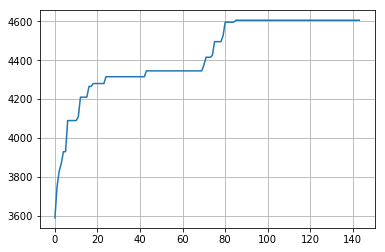

In [17]:
import matplotlib.pyplot as plt

plt.plot(pygarv.receita)
plt.grid()
plt.show()

É importante destacar que nem sempre um Algoritmo Genético encontra a solução ótima, mas que na maioria das vezes encontra uma solução muito próxima da ótima, ou seja, quase ótima.